In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [3]:
base_plano_saude = pd.read_csv("plano_saude.csv")

In [4]:
x_plano_saude = base_plano_saude.iloc[:,0].values
y_plano_saude = base_plano_saude.iloc[:,1].values

In [5]:
np.corrcoef(x_plano_saude,y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [6]:
x_plano_saude = x_plano_saude.reshape(-1,1)

In [7]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude,y_plano_saude)

LinearRegression()

In [8]:
regressor_plano_saude.intercept_

-558.9490909090912

In [9]:
regressor_plano_saude.coef_

array([61.86787879])

In [10]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [17]:
grafico = px.scatter(x= x_plano_saude.ravel(),y=y_plano_saude.ravel())
grafico.add_scatter(x= x_plano_saude.ravel(),y= previsoes.ravel())
grafico.show()

In [18]:
regressor_plano_saude.score(x_plano_saude,y_plano_saude)

0.8666112727879174

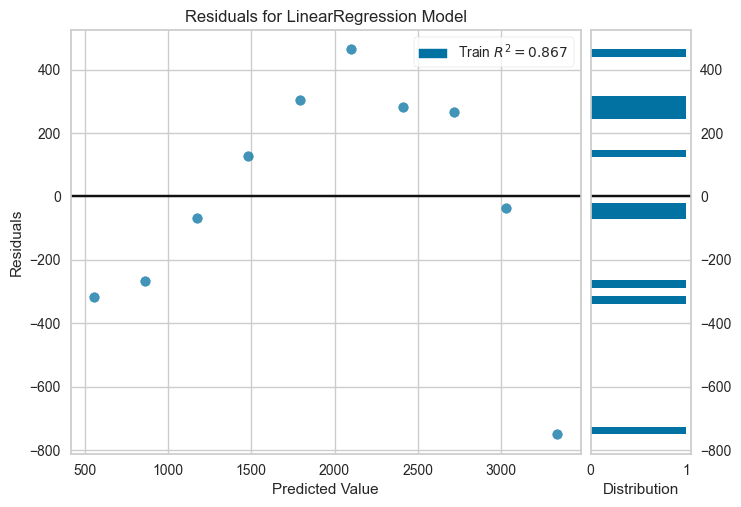

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
from yellowbrick.regressor import ResidualsPlot
vizualizador = ResidualsPlot(regressor_plano_saude)
vizualizador.fit(x_plano_saude,y_plano_saude)
vizualizador.poof()